## Using the Oceanbolt SDK to calculate distances

In this notebook we will go through how you can use the Oceanbolt SDK
to calculate distances between ports and vessels.

In [16]:
from oceanbolt.sdk.client import APIClient
from oceanbolt.sdk.distance import DistanceCalculator
from oceanbolt.sdk.data.entities import Search

import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt



%load_ext dotenv
%dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


With everything setup, we can now calculate the distance between any port pair. Here we are calculating the distance from Houston (US) to Hong Kong (HK)

In [2]:
DistanceCalculator(APIClient()).distance(
    locations=[
        {"unlocode":"HKHKG"},
        {"unlocode":"USHOU"}
    ]
)

10505.383458424754

We can also calculate the distance from a vessel to a port using the current location of the vessel.

In [3]:
Search(APIClient()).search_vessels(q="lowlands tenacity")

,imo,highlevel_type,segment,sub_segment,dwt,max_draught,name,ex_name,built,type_,mpv,loa,beam,holds_total
0,9586801,,Capesize,,179929,0,LOWLANDS TENACITY,,2011,Bulk Carrier,False,292,45,0


In [66]:
DistanceCalculator(APIClient()).distance(
    locations=[
        {"imo":9586801},
        {"unlocode":"SGSIN"}
    ]
)

2751.316515666621

The distance calculator also supports waypoints, if you for example want to calculate a route from A to C, with a stop in B.

In [4]:
DistanceCalculator(APIClient()).distance(
    locations=[
        {"unlocode":"AUPHE"},
        {"unlocode":"HKHKG"},
        {"unlocode":"USHOU"}
    ]
)

13118.744457319666

### Visualizing the results
The distance calculator is also able to return the lat/lons of the shortest route, which can then be visualized on a map. We will use the example from above calculating the distance from Port Hedland to Houston, with a waypoint in Hong Kong.

In [63]:
route = DistanceCalculator(APIClient()).shortest_route(
    locations=[
        {"unlocode":"AUPHE"},
        {"unlocode":"HKHKG"},
        {"unlocode":"USHOU"}
    ]
)
tail = len(route.index)
route.head()

,lon,lat
0,118.526032,-20.218397
1,118.944556,-9.515028
2,119.197,-8.610889
3,118.752889,-2.77675
4,118.999583,0.984167


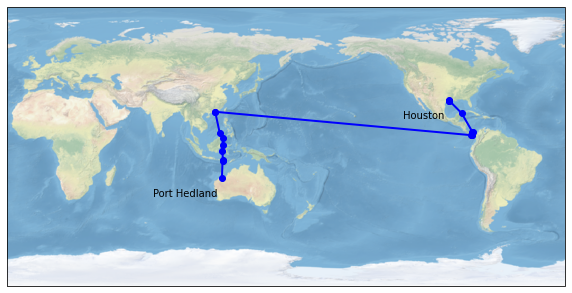

In [65]:
#Lets plot the data
plt.figure(figsize=(10,8))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=160))
ax.stock_img()
plt.plot(route["lon"].to_numpy(), route["lat"].to_numpy(),
         color='blue', linewidth=2, marker='o',transform=ccrs.PlateCarree()
         )
plt.text(route["lon"].to_numpy()[0] - 3, route["lat"].to_numpy()[0] - 12, 'Port Hedland',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(route["lon"].to_numpy()[tail-1] - 3, route["lat"].to_numpy()[tail-1] - 12, 'Houston',
         horizontalalignment='right',
         transform=ccrs.Geodetic())
plt.show()


### Plotting shortest route from current location of a vessel
We can also show the shortest route from the current location of a vessel. Here we will plot the shortest route from the vessel Lowlands Tenacity's current locatation to the port of Singapore.

In [67]:
route = DistanceCalculator(APIClient()).shortest_route(
    locations=[
        {"imo":9586801},
        {"unlocode":"SGSIN"}
    ]
)
tail = len(route.index)
route.head()

,lon,lat
0,66.23309,-15.86063
1,95.227528,5.582944
2,97.503306,5.255389
3,103.511667,1.2695
4,103.635389,1.336611


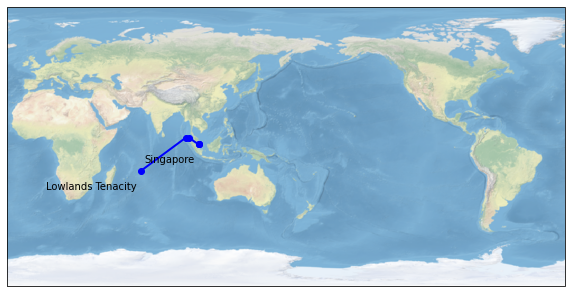

In [69]:
#Lets plot the data
plt.figure(figsize=(10,8))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=160))
ax.stock_img()
plt.plot(route["lon"].to_numpy(), route["lat"].to_numpy(),
         color='blue', linewidth=2, marker='o',transform=ccrs.PlateCarree()
         )
plt.text(route["lon"].to_numpy()[0] - 3, route["lat"].to_numpy()[0] - 12, 'Lowlands Tenacity',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(route["lon"].to_numpy()[tail-1] - 3, route["lat"].to_numpy()[tail-1] - 12, 'Singapore',
         horizontalalignment='right',
         transform=ccrs.Geodetic())
plt.show()
